## Exercise 1: Test and train RSS for subset selection

### a.

Best subset selection has the most flexibility (searches a larger model space) so it should have the smallest test error for each $k$

### b.

The answer depends on the value of $k$. When $k < p - k$, FSS yeilds a less flexible model while BSS yeilds a more flexible model, so FSS should have a lower test RSS than BSS. When $k > p -k$, the converse shoule be true.

### c.

i. True. FSS augments the by a single predictor at each iteration.
ii. False. Replace $k + 1$ by $k - 1$ and this becomes true.
iii. False. There is no necessary connection between the models identified by FSS and BSS.
iv. False. Same reason.
v. False. Best subset considers all possible subsets of $k+1$ predictors so it may include a predictor in $\mathcal{M}_{k+1}$ that was not in $\mathcal{M}_k$.

## Exercise 2: Comparing Lasso Regression, Ridge Regression, and Least Squares

### a.

(iii) is correct. The Lasso is less flexible since it searches a restricted parameter space (i.e. not $\mathbb{R}^p$), so it will usually have increased bias and decreased variance.

### b.

(iii) is correct again, for the same reasons

### c.

(ii) is correct. Non-linear methods are more flexible which usually means decreased bias and increased variance. 

## Exercise 3: How change in $s$ affects Lasso performance

### a. Train RSS

None of these answers seem correct. 

For some small $s > 0$, i.e. some $\ell_1$-neighborhood $B_s(\mathbf{0})\subseteq\mathbb{R}^p$, the least squares estimator $\hat{\beta}_{LS}\notin B_s(\mathbf{0})$, hence the Lasso estimator $\hat{\beta}_{Lasso} \neq \hat{\beta}_{LS}$, so $RSS_{train}(\hat{\beta}_{Lasso}) \geqslant RSS_{train}(\hat{\beta}_{LS})$.  As $s \rightarrow \|\hat{\beta}_{LS}\|_1$ from below, $\hat{\beta}_{Lasso} \rightarrow \hat{\beta}_{LS}$, so $RSS_{train}(\hat{\beta}_{Lasso}) \rightarrow RSS_{train}(\hat{\beta}_{LS})$ from above. When $s \geqslant \|\hat{\beta}_{LS}\|_1$, $\hat{\beta}_{Lasso} = \hat{\beta}_{LS}$ so $RSS_{train}(\hat{\beta}_{Lasso}) = RSS_{train}(\hat{\beta}_{LS})$.

In other words, $RSS_{train}(\hat{\beta}_{Lasso})$ will initially decrease as $s$ increases, until $B_s(\mathbf{0})$ catches $\hat{\beta}_{LS}$, and thereafter it will remain constant $RSS_{train}(\hat{\beta}_{Lasso}) = RSS_{train}(\hat{\beta}_{LS})$. The closest answer is (iv), although "steadily decreasing" isn't the same thing.

A better answer would be (iv) then (v).

### b. Test RSS

(ii) Test RSS will be minimized at some optimal value $s_0$ of $s$ and will be greater for $s < s_0$ (lower flexibility and bias outweighs variance) and $s > s_0$ (higher flexibility and variance outweighs bias). <sup><a href="#foot0" id='ref0'>0</a></sup>

### c. Variance

(iii) We expect variance to increase monotonically with model flexibility.

### d. (Squared) Bias

(iv) We expect bias to decrease monotonically with model flexibility.

### e. Irreducible Error

(v). The irredicible error is the variance of the noise $\mathbb{V}(\epsilon)$ which is not a function of $s$.

## Exercise 4: How change in $\lambda$ affects Regression performance.

For this exercise, we can observe that $s \uparrow\ \Rightarrow\ \lambda \downarrow$ (that is, model flexibility increases as $s$ increases) and that our answers will be unaffected by whether we use the $\ell_1$ norm (Lasso) or $\ell_2$ norm (Ridge), so we can use the same reasoning as in [exercise 3](#Exercise-3:-How-change-in-$s$-affects-Lasso-performance)

### a. Train RSS

(v) then (iii)

### b. Test RSS

(ii)

### c. Variance

(iv)

### d. Irreducible Error

(v)

## Exercise 5: Ridge and Lasso treat correlated variables differently

For this exercise we have data

$$\{(x_{11}, x_{12}, y_1), (x_{21}, x_{22}, y_2)\} = \{(x_{11}, x_{11}, y_1), (-x_{11}, -x_{11}, -y_1)\}$$



### a. The ridge optimization problem

The ridge regression problem in general is

$$
\begin{align*}
\underset{\beta}{\min}&\ \ RSS(\beta) + \lambda\| \tilde{\beta} \|_2
\end{align*}
$$

For this problem

$$ 
\begin{align}
RSS &= \big(y_1 - (\beta_0 + \beta_1 x_{11} + \beta_2 x_{12})\big)^2 +  \big(y_2 - (\beta_0 + \beta_1 x_{21} + \beta_2 x_{22})\big)^2\\
&= \big(y_1 - \beta_0 - \beta_1 x_{11} - \beta_2 x_{12}\big)^2 +  \big(y_2 - \beta_0 - \beta_1 x_{21} - \beta_2 x_{22}\big)^2\\
&= \big(y_1 - \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 +  \big(y_1 + \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2\\
\end{align}
$$

so we have the optimization problem

$$
\begin{align*}
\underset{\beta}{\min}&\ \ \big(y_1 - \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 +  \big(y_1 + \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 + \lambda(\beta_1^2 + \beta_2^2)
\end{align*}
$$

### b. The ridge coefficient estimates

Since we know $\hat{\beta}_0 = 0$, we have the (slightly) simpler problem

$$
\begin{align*}
\underset{(\beta_1, \beta_2)}{\min}&\ \ \big(y_1 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 + \lambda(\beta_1^2 + \beta_2^2)
\end{align*}
$$

write $f(\beta_1, \beta_2)$ for this objective function we are trying to minimize <sup><a href="#foot1" id='ref1'>1</sup>. Taking partial derivatives and setting equal to zero

$$
\begin{align*}
\frac{\partial f}{\partial \beta_1} &= 2(\lambda + x_{11}^2)\beta_1 + 2x_{11}^2\beta_2 - 2x_{11}y_1 = 0\\
\frac{\partial f}{\partial \beta_1} &= 2(\lambda + x_{11}^2)\beta_2 + 2x_{11}^2\beta_1 - 2x_{11}y_1 = 0\\
\end{align*}
$$

Subtract the first equation from the second and collect $\beta_1, \beta_2$ terms. Since by assumption<sup><a href="#foot1" id='ref1'>1</sup> $\lambda \neq 0$) we can divide through by $\big((\lambda + x_{11})^2 - x_{11}\big)^2$ to find $0 = \beta_{1} - \beta_{2}$, hence
    $\hat{\beta}_1 = \hat{\beta}_2$.<sup><a href="#foot2" id='ref2'>2</a></sup>

### c. The lasso optimization problem

The lasso regression problem in general is

$$
\begin{align*}
\underset{\beta}{\min}&\ \ RSS(\beta) + \lambda\| \tilde{\beta} \|_1
\end{align*}
$$

For this problem RSS is the same as for [part b](#b.-The-ridge-coefficient-estimates)
$$ 
\begin{align}
RSS &= \big(y_1 - (\beta_0 + \beta_1 x_{11} + \beta_2 x_{12})\big)^2 +  \big(y_2 - (\beta_0 + \beta_1 x_{21} + \beta_2 x_{22})\big)^2\\
&= \big(y_1 - \beta_0 - \beta_1 x_{11} - \beta_2 x_{12}\big)^2 +  \big(y_2 - \beta_0 - \beta_1 x_{21} - \beta_2 x_{22}\big)^2\\
&= \big(y_1 - \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 +  \big(y_1 + \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2\\
\end{align}
$$

so we have the optimization problem

$$
\begin{align*}
\underset{\beta}{\min}&\ \ \big(y_1 - \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 +  \big(y_1 + \beta_0 - \beta_1 x_{11} - \beta_2 x_{11}\big)^2 + \lambda(|\beta_1| + |\beta_2|)
\end{align*}
$$

### d. The lasso coefficient estimates

Again, since we know $\hat{\beta}_0 = 0$, we have the (slightly) simpler problem

$$
\begin{align*}
\underset{(\beta_1, \beta_2)}{\min}&\ \ \big(y_1 - (\beta_1 + \beta_2) x_{11}\big)^2 + \lambda(|\beta_1| + |\beta_2|)
\end{align*}
$$

again write $f(\beta_1, \beta_2)$ for this objective function.

It is somewhat difficult to argue analytically that this function has no unique global minimum, so we'll look at some graphs

#### Visualizing some examples

Here we'll graph the objective function $f(\beta_1, \beta_2)$ for the case $x_{11} = 1, y_1 = 1, \lambda = 1$ to get a sense of what's going on:

In [39]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

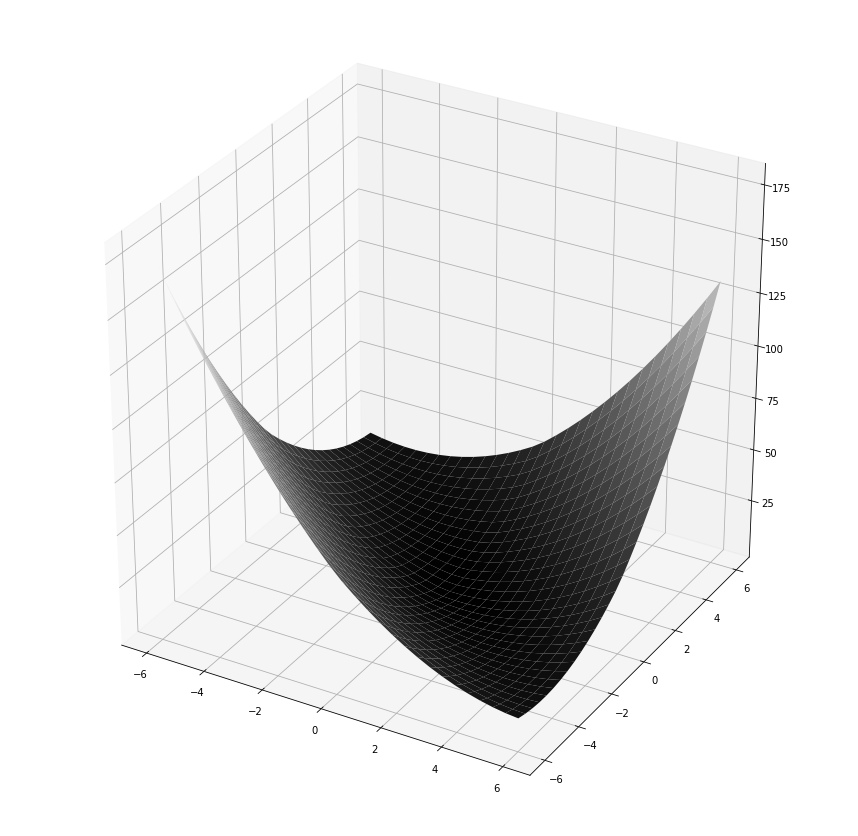

In [57]:
(x, y, lambda_) = (1, 1, 1)
beta_1 = np.linspace(-6, 6, 30)
beta_2 = beta_1

X, Y = np.meshgrid(beta_1, beta_2)
Z = np.square(y - (X + Y)*x) + lambda_*(np.absolute(X) + np.absolute(Y))

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='gray', edgecolor='none')

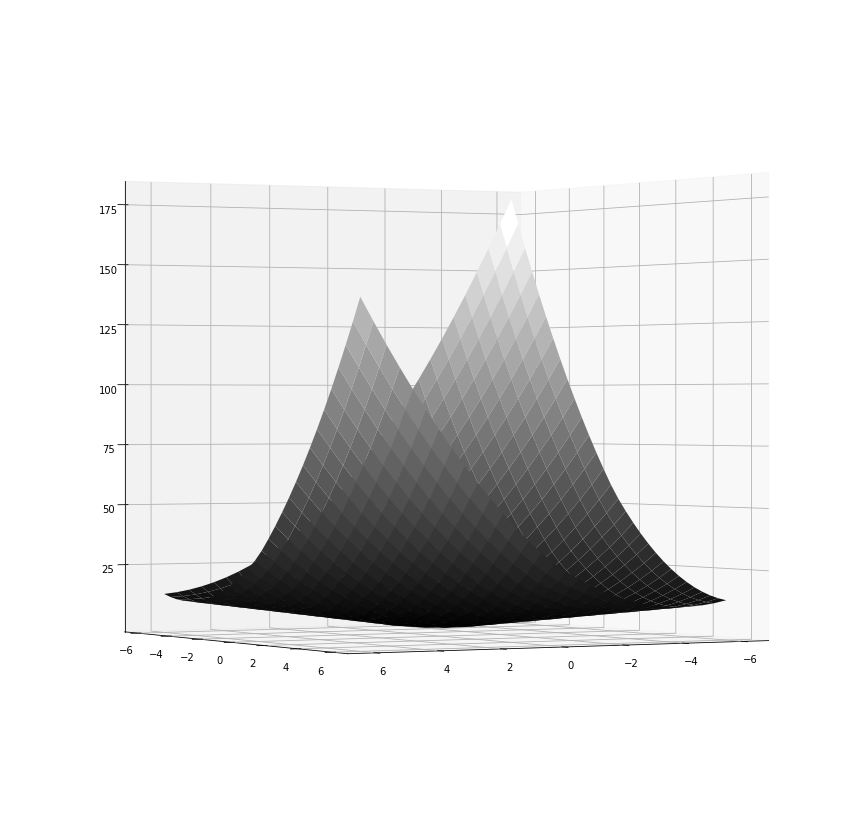

In [62]:
ax.view_init(0, 60)
fig

###

It's difficult to see from this picture, but it appears that minimum of this graph is $(\beta_1, \beta_2) = (0, 0)$, which is uninteresting.

Now let's look at $x_{11} = -2, y_1 = 3, \lambda = 10$

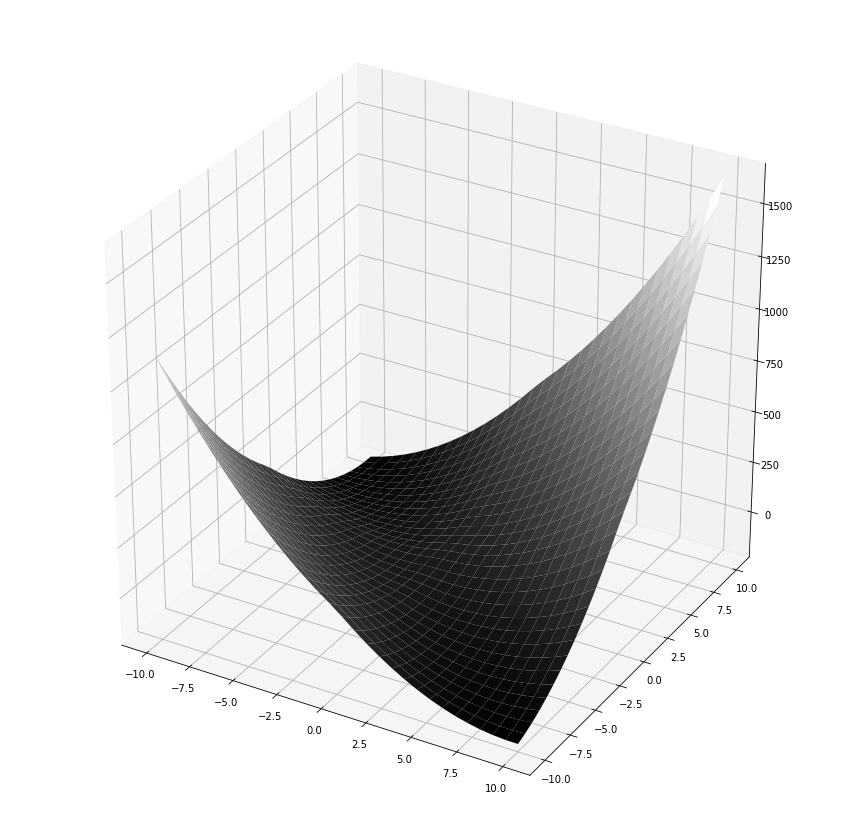

In [56]:
(x, y, lambda_) = (-2, 3, 10)
Z = np.square(y - (X + Y)*x) - lambda_*(np.absolute(X) + np.absolute(Y))

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='gray', edgecolor='none')

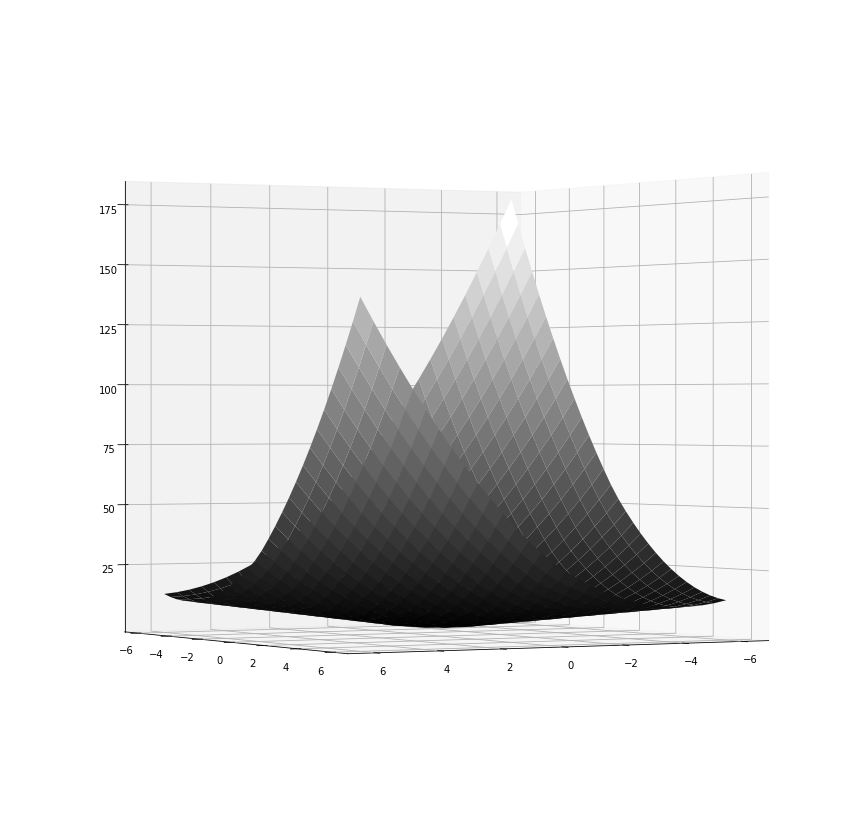

In [61]:
ax.view_init(0, 60)
fig

Now we can see no global minimum whatsoever

#### Arguing analytically

The graphs above have suggested no global minimum exists, so let's see if we can argue that analytically. 

Observe that, since $|x|$ is a piecewise function, $f(\beta_1, \beta_2)$ is. Thus we can minimize $f$ by minimizing each of

$$
f_{(+,+)}(\beta_1, \beta_2) = \big(y_1 - (\beta_1 + \beta_2) x_{11}\big)^2 + \lambda(\beta_1 + \beta_2)
f_{(+,-)}(\beta_1, \beta_2) = \big(y_1 - (\beta_1 + \beta_2) x_{11}\big)^2 + \lambda(\beta_1 - \beta_2)
f_{(-,+)}(\beta_1, \beta_2) = \big(y_1 - (\beta_1 + \beta_2) x_{11}\big)^2 + \lambda(-\beta_1 + \beta_2)
f_{(-,-)}(\beta_1, \beta_2) = \big(y_1 - (\beta_1 + \beta_2) x_{11}\big)^2 + \lambda(-\beta_1 - \beta_2)
$$

and then taking the minimum over all of these.<sup><a href="#foot3" id='ref3'>3</a></sup>

This corresponds to find

##### Minimizing $f_{(+,+)}$ and $f_{(-,-)}$.

Taking partial derivatives <sup><a href="#foot4" id='ref4'>4</a></sup> of $f_{(+,+)}$ and setting equal to zero

$$
\begin{align*}
\frac{\partial f_{(+,+)}}{\partial \beta_1} &= 2x_{11}^2\beta_1 + 2x_{11}^2\beta_2 + 2(\lambda - x_{11}y_1) = 0\\
\frac{\partial f_{(+,+)}}{\partial \beta_2} &= 2x_{11}^2\beta_1 + 2x_{11}^2\beta_2 + 2(\lambda - x_{11}y_1) = 0\\
\end{align*}
$$

these equations are redundant, so we find a minimum for $\beta_1, \beta_2 \geqslant 0$ whenever:

$$\beta_1 = -\beta_2 - \frac{\lambda - x_{11}y_1}{x_{11}^2}$$

Similarly, we find a minimum for $\beta_1, \beta_2 \leqslant 0$ whenever:

$$\beta_1 = -\beta_2 + \frac{\lambda + x_{11}y_1}{x_{11}^2}$$

##### Minimizing $f_{(+, -)}$,  $f_{(-, +)}$

Taking partial derivatives and setting equal to zero

$$
\begin{align*}
\frac{\partial f_{(+,-)}}{\partial \beta_1} &= 2x_{11}^2\beta_1 + 2x_{11}^2\beta_2 + 2(\lambda - x_{11}y_1) = 0\\
\frac{\partial f_{(+,-)}}{\partial \beta_2} &= 2x_{11}^2\beta_1 + 2x_{11}^2\beta_2 - 2(\lambda + x_{11}y_1) = 0\\
\end{align*}
$$

Subtracting the first equation from the second and doing some algebra, we find $\lambda = 0$, which is a case we're not considering. 

Now, focusing on the first equation, we conlude $f(\beta_1, \beta_2)$ is strictly decreasing for $\beta_1 \geqslant 0, \beta_2 \leqslant 0$ as long as

$$ \beta_2 < \frac{2(\lambda - y_1x_{11})}{x_{11}^2} $$

This inequality is always satisfied for some values of $\beta_2 \leqslant 0$, so we conclude that, provided $\lambda \neq 0$, $f(\beta_1, \beta_2)$ is always strictly decreasing along some direction.

##### Conclusions

Exactly one of the following is true:

- $\lambda = 0$, in which case a global minimum of $RSS$ exists but we are doing trivial lasso regression (i.e. just ordinary least squares).

- $\lambda \neq 0$, in which case no global minimum of $RSS$ exists.

Thus, if we are looking for non-trivial lasso coefficient estimates, we cannot find unique ones.<sup><a href="#foot5" id='ref5'>5</a></sup>

## Exercise 6: Ridge and Lasso when $n=p=1$, $\beta_0 = 1$, and $x = 1$.

### a. Ridge regression

Consider (6.12) in the case $n=p=1$. Then the minimization problem becomes


$$
\begin{align*}
\underset{\beta_1}{\min}&\ \ \big(y - \beta_1\big)^2 +  \lambda\beta_1^2
\end{align*}
$$

Now we plot for the case $y = \lambda = 1$

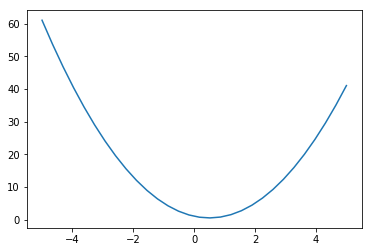

In [66]:
lambda_,y = 1, 1

X = np.linspace(-5, 5, 30)
Y = np.square(1 - X) + np.square(X)

plt.plot(X, Y)

It's easy to believe that the minimum is at the value given by (6.14):

$$\hat{\beta_1}^R = \frac{y}{1 + \lambda} = \frac{1}{2}$$

### b. Lasso regression

Consider (6.13) in the case $n=p=1$. Then the minimization problem becomes

$$
\begin{align*}
\underset{\beta_1}{\min}&\ \ \big(y - \beta_1\big)^2 +  \lambda|\beta_1|
\end{align*}
$$

Now we plot for the case $y = \lambda = 1$

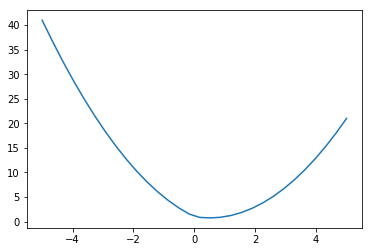

In [67]:
lambda_,y = 1, 1

X = np.linspace(-5, 5, 30)
Y = np.square(1 - X) + np.absolute(X)

plt.plot(X, Y)

It's easy to believe that the minimum is at the value given by (6.15):

$$\hat{\beta_1}^L = y - \frac{\lambda}{2} = \frac{1}{2}$$

### Exercise 7: Deriving the Bayesian connection between Ridge and Lasso

### a. Likelihood for the linear model with Gaussian noise

We assume

$$ Y = \mathbf{X}\beta + \epsilon $$

where $\epsilon_i \sim N(0, \sigma^2)$ iid.<sup><a href="#foot6" id='ref6'>6</a></sup>.

The likelihood is<sup><a href="#foot7" id='ref7'>7</a></sup>

$$
\begin{align*}
f(Y|\mathbf{X}, \beta) &= \prod_{i=1}^n f(Y_i| X_i, \beta)\\
&= \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(\frac{-(Y - X_i\beta)^2}{2\sigma^2}\right)\\
&= (2\pi\sigma^2)^{-2n}\exp\left(\frac{-n(Y - X_i\beta)^2}{2\sigma^2}\right)
\end{align*}
$$

### b.

### c.

### d.

### e.

## Footnotes

<p>
</p>

<div id="foot0"> 0. For evidence, we can observe that $s \uparrow\ \Rightarrow\ \lambda \downarrow$, and look at Figure 6.8 as a typical example.
<a href="#ref0"> &#8617; </a>
</div>

<p>
</p>

<div id="foot1"> 1. We know that $\lambda = 0$ will give a minimum, but then we just have the least squares solution. So assuming $\lambda \neq 0$ is determined by other means (e.g. cross validation), our objective function shouldn't depend on $\lambda$.
<a href="#ref0"> &#8617; </a>
</div>

<p>
</p>

<div id="foot2"> 2. Note that, even though we know the ridge regression coefficient estimates are equal, they aren't unique. So there are still "many possible solutions to the optimization problem". Still, the spirit of this problem is that 
<a href="#ref2"> &#8617; </a>
</div>

<p>
</p>

<div id="foot3"> 3. That is, find the minima of $f(\beta_1, \beta_2)$ in each of the four quadrants of the $(\beta_1, \beta_2)$ plane and take the minimum over the quadrants.
<a href="#ref3"> &#8617; </a>
</div>

<p>
</p>

<div id="foot3"> 4. Strictly speaking, we are taking "one-sided derivatives".
<a href="#ref3"> &#8617; </a>
</div>

<p>
</p>

<div id="foot3"> 5. This is presumably what the book means by "many possible solutions to the optimization problem".
<a href="#ref3"> &#8617; </a>
</div>


<p>
</p>

<div id="foot3"> 6. As usual, $\beta = (\beta_0, \dots, \beta_p)^\top$, $\epsilon = (\epsilon_1, \dots, \epsilon_n)^\top$ and the first column of $\mathbf{X}$ is $(1, \dots, 1)^\top \in \mathbb{R}^n$.
<a href="#ref3"> &#8617; </a>
</div>

<p>
</p>

<div id="foot3"> 7. This follows, since the random variable $Y_i$ conditioned on the random variates $X_i = x_i, \beta = \beta$ is $x_i^\top\beta + \epsilon_i$, and from $\epsilon_i \sim N(0, \sigma^2)$ it follows that $Y_i | X_i, \beta \sim N(X_i\beta, \sigma^2)$.
</div>